# Sales order data exploration

Use the code in this notebook to explore sales order data.


In [3]:
df = spark.read.format("csv").option("header","false").load("abfss://AvinashWS@onelake.dfs.fabric.microsoft.com/ARLH.Lakehouse/Files/orders/2019.csv")
# df now is a Spark DataFrame containing CSV data from "abfss://AvinashWS@onelake.dfs.fabric.microsoft.com/ARLH.Lakehouse/Files/orders/2019.csv".
display(df)

StatementMeta(, df4a01ab-7473-4ef1-9692-cf5017be51e4, 8, Finished, Available)

SynapseWidget(Synapse.DataFrame, 47d043f6-3ee3-4f5e-8bd3-65fcd7daeaf2)

In [4]:
from pyspark.sql.types import *

orderSchema = StructType([
   StructField("SalesOrderNumber", StringType()),
   StructField("SalesOrderLineNumber", IntegerType()),
   StructField("OrderDate", DateType()),
   StructField("CustomerName", StringType()),
   StructField("Email", StringType()),
   StructField("Item", StringType()),
   StructField("Quantity", IntegerType()),
   StructField("UnitPrice", FloatType()),
   StructField("Tax", FloatType())
   ])

df = spark.read.format("csv").schema(orderSchema).load("Files/orders/2019.csv")
display(df)

StatementMeta(, df4a01ab-7473-4ef1-9692-cf5017be51e4, 11, Finished, Available)

SynapseWidget(Synapse.DataFrame, 6c02b574-2422-4862-862f-dbed4393f5e3)

In [5]:
from pyspark.sql.types import *

orderSchema = StructType([
   StructField("SalesOrderNumber", StringType()),
   StructField("SalesOrderLineNumber", IntegerType()),
   StructField("OrderDate", DateType()),
   StructField("CustomerName", StringType()),
   StructField("Email", StringType()),
   StructField("Item", StringType()),
   StructField("Quantity", IntegerType()),
   StructField("UnitPrice", FloatType()),
   StructField("Tax", FloatType())
   ])

df = spark.read.format("csv").schema(orderSchema).load("Files/orders/*.csv")
display(df)

StatementMeta(, df4a01ab-7473-4ef1-9692-cf5017be51e4, 14, Finished, Available)

SynapseWidget(Synapse.DataFrame, 3f37da33-f9ed-45a4-aaa5-482d100b22e0)

In [6]:
customers = df['CustomerName', 'Email']
print(customers.count())
print(customers.distinct().count())
display(customers.distinct())

StatementMeta(, df4a01ab-7473-4ef1-9692-cf5017be51e4, 17, Finished, Available)

32718
12427


SynapseWidget(Synapse.DataFrame, e3c3f6b1-4d9d-4e1e-b6e6-c375159ad552)

In [8]:
customers = df.select("CustomerName", "Email", "Item").where(df['Item']=='Road-250 Red, 52')
print(customers.count())
print(customers.distinct().count())
display(customers.distinct())

StatementMeta(, df4a01ab-7473-4ef1-9692-cf5017be51e4, 19, Finished, Available)

133
133


SynapseWidget(Synapse.DataFrame, 152eb76d-52c7-48fa-8386-fa699bc78efc)

In [9]:
productSales = df.select("Item", "Quantity").groupBy("Item").sum()
display(productSales)

StatementMeta(, df4a01ab-7473-4ef1-9692-cf5017be51e4, 20, Finished, Available)

SynapseWidget(Synapse.DataFrame, 5d95e969-b235-4684-9b12-9f28230c609e)

In [12]:
display(df)

StatementMeta(, df4a01ab-7473-4ef1-9692-cf5017be51e4, 25, Finished, Available)

SynapseWidget(Synapse.DataFrame, ac1cb1aa-0b94-4d9b-b849-b086a66e6688)

In [10]:
from pyspark.sql.functions import *

yearlySales = df.select(year(col("OrderDate")).alias("Year")).groupBy("Year").count().orderBy("Year")
display(yearlySales)

StatementMeta(, df4a01ab-7473-4ef1-9692-cf5017be51e4, 21, Finished, Available)

SynapseWidget(Synapse.DataFrame, c3e6b3bf-804e-461e-927e-05b80619507e)

In [18]:
df.dtypes

StatementMeta(, df4a01ab-7473-4ef1-9692-cf5017be51e4, 31, Finished, Available)

[('SalesOrderNumber', 'string'),
 ('SalesOrderLineNumber', 'int'),
 ('OrderDate', 'date'),
 ('CustomerName', 'string'),
 ('Email', 'string'),
 ('Item', 'string'),
 ('Quantity', 'int'),
 ('UnitPrice', 'float'),
 ('Tax', 'float')]

In [20]:
from pyspark.sql.functions import *
# display(df.head(5))
## Create Year and Month columns
transformed_df = df.withColumn("Year", year(col("OrderDate"))).withColumn("Month", month(col("OrderDate")))
# display(transformed_df.head(5))
# Create the new FirstName and LastName fields
transformed_df = transformed_df.withColumn("FirstName", split(col("CustomerName"), " ").getItem(0)).withColumn("LastName", split(col("CustomerName"), " ").getItem(1))
# display(transformed_df.head(5))
# # Filter and reorder columns
transformed_df = transformed_df["SalesOrderNumber", "SalesOrderLineNumber", "OrderDate", "Year", "Month", "FirstName", "LastName", "Email", "Item", "Quantity", "UnitPrice", "Tax"]

# # Display the first five orders
display(transformed_df.limit(5))

StatementMeta(, df4a01ab-7473-4ef1-9692-cf5017be51e4, 33, Finished, Available)

SynapseWidget(Synapse.DataFrame, 03d65f35-3cfa-49f8-aa14-f83c4c262de8)

In [24]:
transformed_df.write.mode("overwrite").parquet('Files/transformed_data/orders')
print ("Transformed data saved!")

StatementMeta(, df4a01ab-7473-4ef1-9692-cf5017be51e4, 37, Finished, Available)

Transformed data saved!


In [25]:
orders_df = spark.read.format("parquet").load("Files/transformed_data/orders")
display(orders_df.limit(5))

StatementMeta(, df4a01ab-7473-4ef1-9692-cf5017be51e4, 38, Finished, Available)

SynapseWidget(Synapse.DataFrame, dcf6f469-e42a-4da7-9538-dade4eda7c08)

In [26]:
orders_df.write.partitionBy("Year","Month").mode("overwrite").parquet("Files/partitioned_data")
print ("Transformed data saved!")

StatementMeta(, df4a01ab-7473-4ef1-9692-cf5017be51e4, 39, Finished, Available)

Transformed data saved!


In [27]:
orders_2021_df = spark.read.format("parquet").load("Files/partitioned_data/Year=2021/Month=*")
display(orders_2021_df)

StatementMeta(, df4a01ab-7473-4ef1-9692-cf5017be51e4, 46, Finished, Available)

SynapseWidget(Synapse.DataFrame, 13240786-de03-41f2-b47b-25556bd209ae)

In [28]:
# Create a new table
df.write.format("delta").saveAsTable("salesorders")

# Get the table description
spark.sql("DESCRIBE EXTENDED salesorders").show(truncate=False)

StatementMeta(, df4a01ab-7473-4ef1-9692-cf5017be51e4, 41, Finished, Available)

+----------------------------+-------------------------------------------------------------------------------------------------------------------------------------+-------+
|col_name                    |data_type                                                                                                                            |comment|
+----------------------------+-------------------------------------------------------------------------------------------------------------------------------------+-------+
|SalesOrderNumber            |string                                                                                                                               |null   |
|SalesOrderLineNumber        |int                                                                                                                                  |null   |
|OrderDate                   |date                                                                                                     

In [29]:

# With Spark SQL, Please run the query onto the lakehouse which is from the same workspace as the current default lakehouse.
df = spark.sql("SELECT * FROM ARLH.salesorders LIMIT 1000")
display(df)

StatementMeta(, df4a01ab-7473-4ef1-9692-cf5017be51e4, 44, Finished, Available)

SynapseWidget(Synapse.DataFrame, 3883f852-3a28-4f0c-b295-c496342df2c2)

In [30]:
%%sql
SELECT YEAR(OrderDate) AS OrderYear,
      SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue
FROM salesorders
GROUP BY YEAR(OrderDate)
ORDER BY OrderYear;

StatementMeta(, df4a01ab-7473-4ef1-9692-cf5017be51e4, 47, Finished, Available)

<Spark SQL result set with 3 rows and 2 fields>

In [31]:
%%sql
SELECT * FROM salesorders

StatementMeta(, df4a01ab-7473-4ef1-9692-cf5017be51e4, 48, Finished, Available)

<Spark SQL result set with 1000 rows and 9 fields>

In [32]:
sqlQuery = "SELECT CAST(YEAR(OrderDate) AS CHAR(4)) AS OrderYear, \
               SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue \
           FROM salesorders \
           GROUP BY CAST(YEAR(OrderDate) AS CHAR(4)) \
           ORDER BY OrderYear"
df_spark = spark.sql(sqlQuery)
df_spark.show()

StatementMeta(, df4a01ab-7473-4ef1-9692-cf5017be51e4, 49, Finished, Available)

+---------+--------------------+
|OrderYear|        GrossRevenue|
+---------+--------------------+
|     2019|   4172169.969970703|
|     2020|   6882259.268127441|
|     2021|1.1547835291696548E7|
+---------+--------------------+



StatementMeta(, df4a01ab-7473-4ef1-9692-cf5017be51e4, 50, Finished, Available)

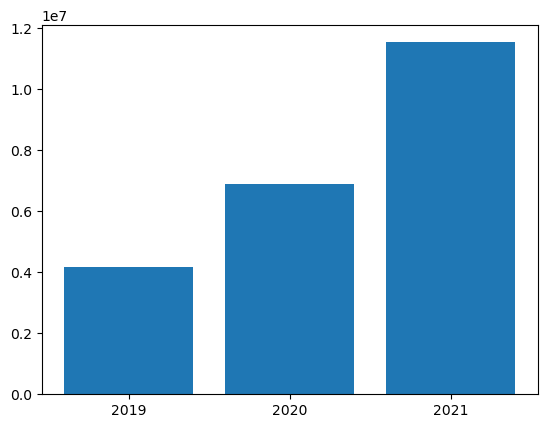

In [33]:
from matplotlib import pyplot as plt

# matplotlib requires a Pandas dataframe, not a Spark one
df_sales = df_spark.toPandas()

# Create a bar plot of revenue by year
plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'])

# Display the plot
plt.show()

StatementMeta(, df4a01ab-7473-4ef1-9692-cf5017be51e4, 51, Finished, Available)

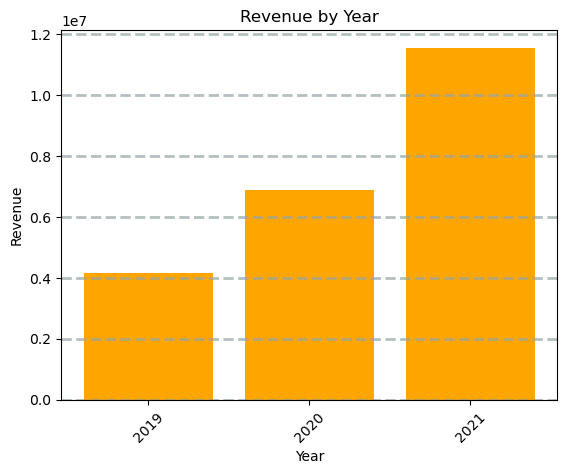

In [34]:
from matplotlib import pyplot as plt

# Clear the plot area
plt.clf()

# Create a bar plot of revenue by year
plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')

# Customize the chart
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=45)

# Show the figure
plt.show()

StatementMeta(, df4a01ab-7473-4ef1-9692-cf5017be51e4, 52, Finished, Available)

<Figure size 640x480 with 0 Axes>

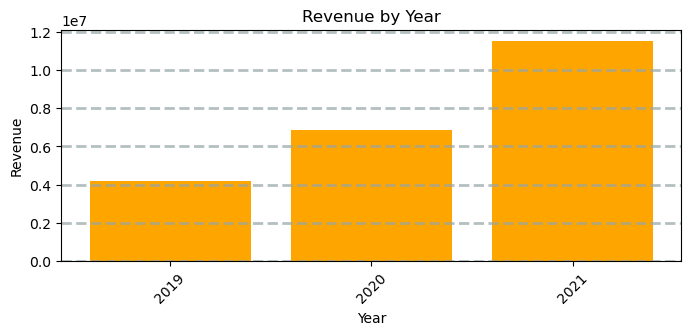

In [35]:
from matplotlib import pyplot as plt

# Clear the plot area
plt.clf()

# Create a Figure
fig = plt.figure(figsize=(8,3))

# Create a bar plot of revenue by year
plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')

# Customize the chart
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=45)

# Show the figure
plt.show()

StatementMeta(, df4a01ab-7473-4ef1-9692-cf5017be51e4, 53, Finished, Available)

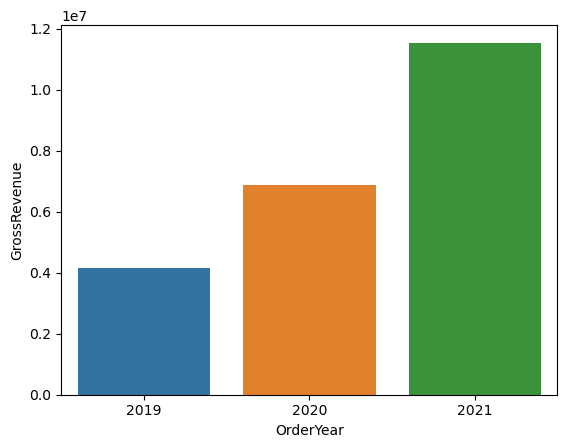

In [36]:
import seaborn as sns

# Clear the plot area
plt.clf()

# Create a bar chart
ax = sns.barplot(x="OrderYear", y="GrossRevenue", data=df_sales)
plt.show()

StatementMeta(, df4a01ab-7473-4ef1-9692-cf5017be51e4, 54, Finished, Available)

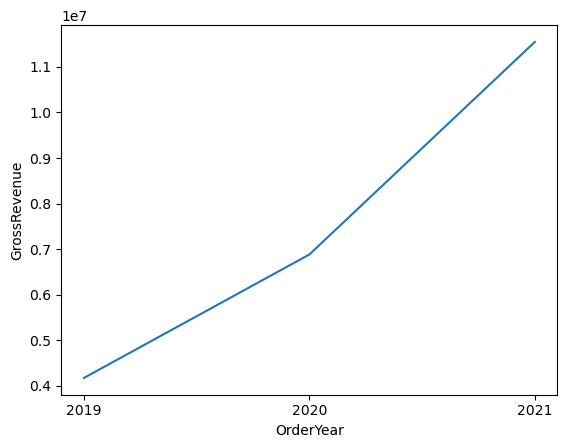

In [37]:
import seaborn as sns

# Clear the plot area
plt.clf()

# Create a line chart
ax = sns.lineplot(x="OrderYear", y="GrossRevenue", data=df_sales)
plt.show()


StatementMeta(, df4a01ab-7473-4ef1-9692-cf5017be51e4, 55, Finished, Available)

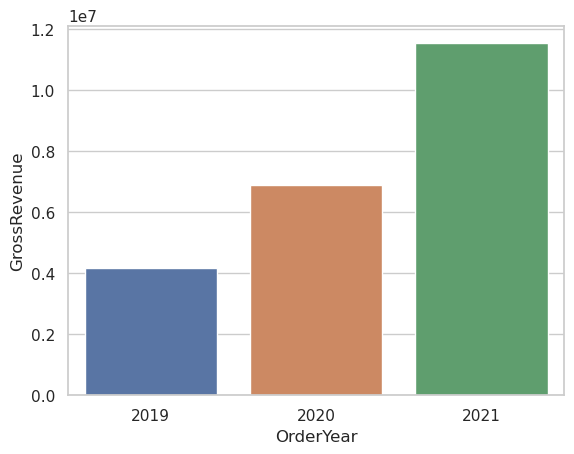

In [38]:
import seaborn as sns

# Clear the plot area
plt.clf()

# Set the visual theme for seaborn
sns.set_theme(style="whitegrid")

# Create a bar chart
ax = sns.barplot(x="OrderYear", y="GrossRevenue", data=df_sales)
plt.show()